In [118]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
with np.load('data_5_1.npz') as data:
    A, C = data['A'], data['C']

In [4]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype=A.dtype)
    A = np.flipud(A)
    for i, row in enumerate(A):
         a[i*w:i*w+w] = row
    return a

def vec2mat(a, shape):
    h, w = shape
    A= np.zeros(shape , dtype=a.dtype)
    for i in range(h):
        A[i, :] = a[i*w:i*w+w] 
    return np.flipud(A)


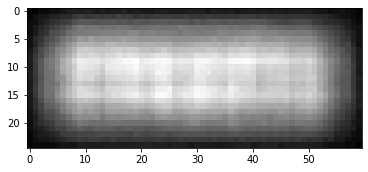

In [6]:
plt.imshow(A, cmap='gray')

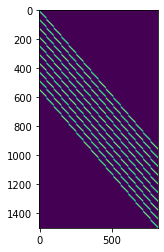

In [12]:
plt.imshow(C)

Напоминает Тёплицеву матрицу, но это не она :( . Но операция, видимо, будет похожа на свертку.

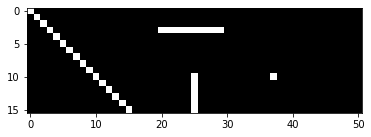

In [92]:
im = np.eye(16, 51)
# im[-10:, -10:] = np.rot90(np.eye(10, 10))
im[3, 20:30] = 1
im[10:, 25] = 1
im[10, 37] = 1

plt.imshow(im, cmap='gray');

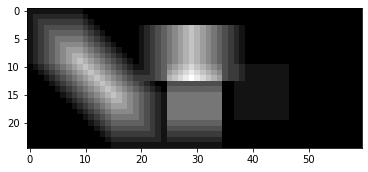

In [93]:
test_a0 = mat2vec(im)
test_a = C @ test_a0

plt.figure()
plt.imshow(vec2mat(test_a, (25, 60)), cmap='gray')
plt.show()

Видимо, каждый пиксель заменяется на квадрат. Потом все квадраты складываются. Не особо свертка.

In [97]:
a = mat2vec(A)

In [98]:
print(f"{A.shape=}")
print(f"{C.shape=}")
print(f"{a.shape=}")

A.shape=(25, 60)
C.shape=(1500, 816)
a.shape=(1500,)


$$
C a_0 = a
$$

Матрица высокая и узкая, значит условий больше чем переменных, значит система переопределенная.  
То есть точного решения мы не найдем. В таких случаях обычно ищут решение, минимизирующее ошибку.   
Например, MSE. Кажется, что выбор MSE оправдан, так как шум распределен по Гауссу.

$$
\| C a_0 - a \|_2^2 \longrightarrow \min_{a_0}
$$

Можно показать, что решением будет $C^\dagger a$, где $C^\dagger = (C^TC)^{-1}C$

$$
C^TC a_0 = C^Ta \\ 
a_0 =(C^TC)^{-1} C^Ta \\ 

$$

In [131]:
U, s, Vt = np.linalg.svd(C, full_matrices=False)
C_pinv = Vt.T * (1/s) @ U.T

assert np.allclose(C_pinv, np.linalg.pinv(C))

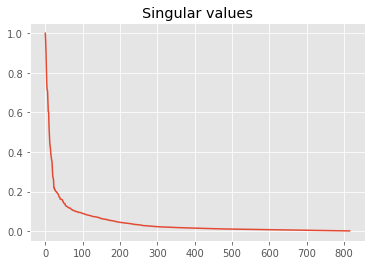

In [119]:
plt.plot(s / s[0])
plt.title('Singular values');

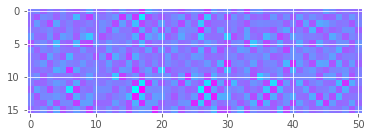

In [138]:
A0 = vec2mat( C_pinv @ mat2vec(A), shape=(16, 51) )
plt.imshow(A0, 'cool');

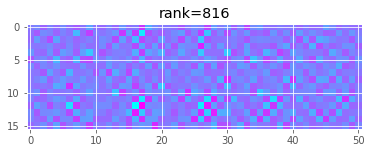

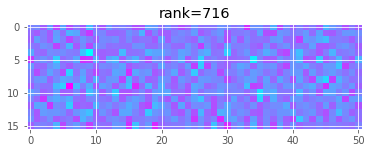

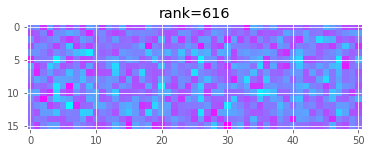

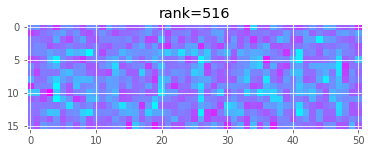

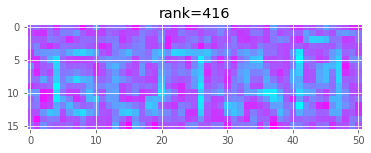

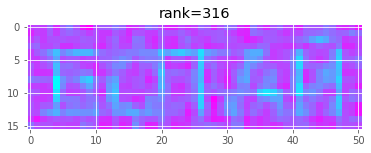

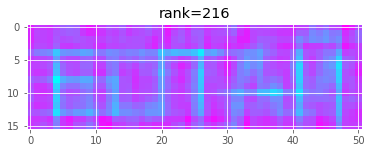

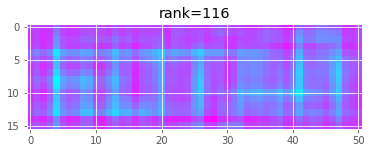

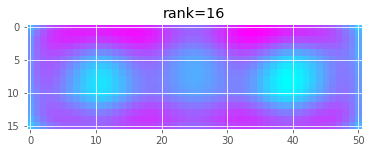

In [140]:
for rank in range(816, 10, -100):
    sigma_pinv = 1 / s
    sigma_pinv[rank:] = 0
    C_pinv = Vt.T * sigma_pinv @ U.T
    A0 = vec2mat( C_pinv @ mat2vec(A), shape=(16, 51) )

    plt.figure()
    plt.imshow(A0, 'cool');
    plt.title(f'{rank=}')

Уже видно надпись "Ботай". Немного поигравшись, я выбрал ранг 400.

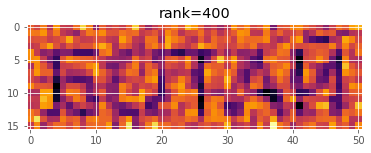

In [142]:
rank = 400

sigma_pinv = 1 / s
sigma_pinv[rank:] = 0
C_pinv = Vt.T * sigma_pinv @ U.T
A0 = vec2mat( C_pinv @ mat2vec(A), shape=(16, 51) )

plt.figure()
plt.imshow(A0, 'inferno');
plt.title(f'{rank=}');